In [81]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({'data' : y_sine} ,index=t_sine)
    return result

def pulse_generator(fs, start, pulsewidth, duration):
    T = duration
    nsamples = fs * T
    t_pulse = np.linspace(0, T, nsamples, endpoint=False)
    y_pulse = np.zeros(nsamples)
    y_pulse[int(fs*start):int(fs*(start+pulsewidth))] = 1
    result = pd.DataFrame({'data' : y_pulse} ,index=t_pulse)
    return result

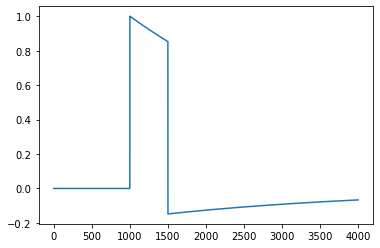

In [82]:
pulse = pulse_generator(1000, 1, 0.5, 4)
data = pulse['data'].to_numpy()
sos = signal.cheby1(1, 1, 0.1, 'highpass', fs=1000, output='sos')
filtered = signal.sosfilt(sos, pulse['data'].to_numpy())
plt.plot(filtered)

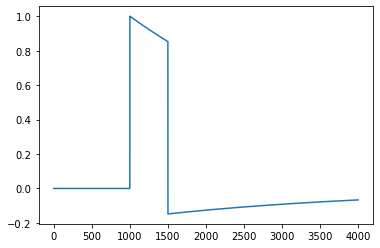

In [83]:
b, a = signal.cheby1(1, 1, 0.1, 'highpass', fs=1000)
analog_filtered = signal.lfilter(b, a, data)
plt.plot(analog_filtered)

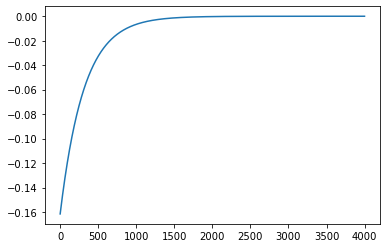

In [243]:
b, a = signal.cheby1(1, 1, 1, 'highpass', fs=1000)
impulse_resp = signal.dimpulse((b, a, 0.001), n=4000)
inv_impulse_resp = signal.dimpulse((a, b, 0.001), n=4000)

mlist = []
nlist = []
for elem in impulse_resp[1][0]:
    mlist.append(elem[0])
mlist = np.array(mlist)
for elem in inv_impulse_resp[1][0]:
    nlist.append(elem[0])
nlist = np.array(nlist)

convolved = signal.oaconvolve(data, mlist, mode='same')
plt.plot(convolved)

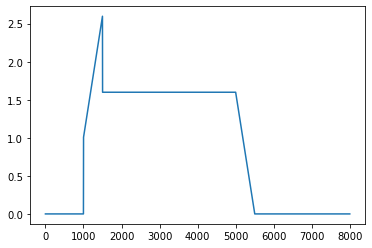

In [233]:
convolved2 = signal.convolve(data, nlist)
plt.plot(convolved2)

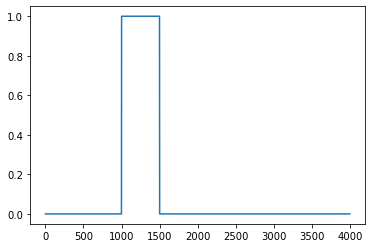

In [251]:
convolved_again = signal.convolve(convolved2[:4000], mlist)
plt.plot(convolved_again[:4000])

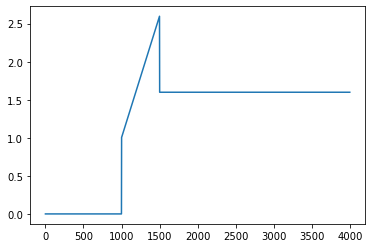

In [252]:
inverted_signal = signal.lfilter(a, b, data)
plt.plot(inverted_signal)

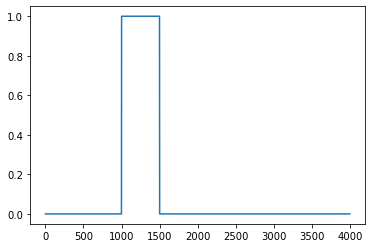

In [253]:
original_signal = signal.lfilter(b, a, inverted_signal)
plt.plot(original_signal)

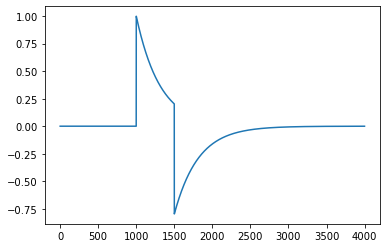

In [254]:
plt.plot(signal.lfilter(b, a, data))

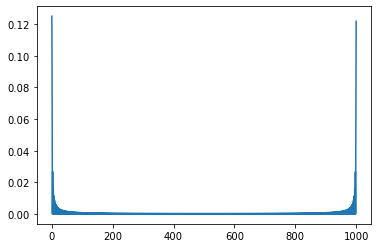

In [269]:
from scipy.fft import fft

n = 4000
Fs = 1000
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
freq = frq[range(n)]   

plt.plot(freq, np.abs(fft(data)/4000))